In [61]:
# проверка на нормальность распредления с помощью Shapiro теста 
# https://stepik.org/lesson/26559/step/6?unit=8406

#Напишите функцию normality_test, которая получает на вход dataframe с произвольным 
#количеством переменных разных типов (количественные, строки, факторы) и проверяет 
#нормальность распределения количественных переменных. 
#Функция должна возвращать вектор значений p-уровней значимости теста shapiro.test для каждой количественной переменной
#Распределение будем считать значимо отклонившимся от нормального, если в тесте shapiro.test() p < 0.05.

from scipy.stats import shapiro
import pandas as pd
import numpy as np

df=pd.read_csv('https://stepic.org/media/attachments/course/524/test.csv')
display(df)


def norm_test(df):
  df_n = df.select_dtypes(include=np.number) # тут мы отсекли столбцы, в которых не содержится чисел (V2 , V4)
  df_s = df_n.apply(shapiro, axis=0)  # тут применили тест Shapiro
  return  df_s.iloc[1]

display(norm_test(df)) # тут выводим уровень значимости теста 

,V1,V2,V3,V4,V5,V6
0,10.03,s,9.35,s,9.91,11.23
1,12.45,x,11.61,x,10.07,6.41
2,9.97,a,7.02,a,8.85,11.38
3,10.53,f,12.24,f,7.22,8.71
4,6.59,b,7.72,b,14.31,10.08
5,7.26,j,12.19,j,10.75,11.71
6,6.97,g,7.80,g,9.91,6.99
7,11.99,o,10.98,o,6.04,11.38
8,9.39,k,9.86,k,9.94,11.14
9,13.58,z,11.12,z,6.58,11.58


V1    0.568211
V3    0.245836
V5    0.314189
V6    0.009374
Name: 1, dtype: float64

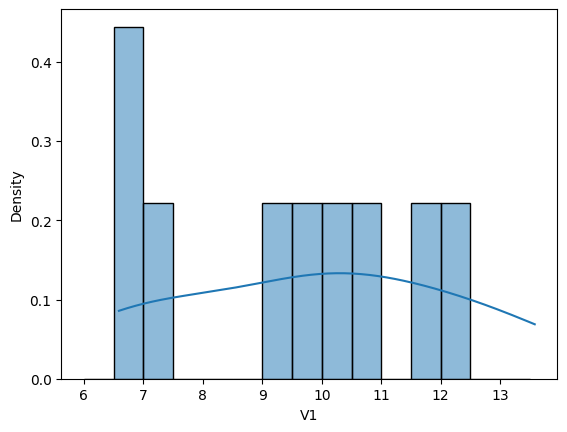

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

df=pd.read_csv('https://stepic.org/media/attachments/course/524/test.csv')

g=sns.histplot(df.V1, kde=True, stat="density", bins=np.arange(6, 14, .5))
# параметр bins дает задать диапазон для значений (6.3 ; 11.7) с шагом 0,01

#for ax in g.axes.flat:
#    ax.xaxis.set_major_locator(MultipleLocator(0.1))
plt.show()



In [11]:
# отвлечемся) эта штука заполняет массив в диапазоне от 0 до 1 с шагом 0.01
# вдруг пригодится
import pandas as pd
import numpy as np
xs = np.arange(0., 1., .01)
print(xs)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [121]:
# проверям распределения на нормальность и на гомогенность дисперсий в группах
# https://stepik.org/lesson/26559/step/7?unit=8406

from scipy.stats import shapiro
from scipy.stats import bartlett
import pandas as pd
import numpy as np
from statistics import pvariance 
from statistics import variance 

df= pd.read_csv("https://stepic.org/media/attachments/course/524/s_anova_test.csv")
#display(df)


xA=[]
xB=[]
xC=[]
for i in range(0, len(df.x)):
    if df.y[i]=='A':
        xA.append(df.x[i])
    elif df.y[i]=='B':
        xB.append(df.x[i])
    else: xC.append(df.x[i])

df_t= pd.DataFrame({'xA':xA,'xB':xB, 'xC':xC})
display(df_t)

# проверям на нормальность распределения    
def norm_test(df_t):
  
  df_n = df_t.apply(shapiro, axis=0)  # тут применили тест Shapiro для каждого из столбцов(axis=0) и перезаписали таблицу
                                    # apply добавило новый столбец со значением теста shapiro
  return  df_n.iloc[1] # тут функция возвращает таблицу со значениями из строки 1 (там записаны p.value)
display('p-val для нормальности распределений', norm_test(df_t)) # выводим p-values (если больше 0.05, значит нормальное распределение)

df_v = df_t.apply(variance, axis=0) # считаем дисперсию для каждого столбца
display('дисперсии для каждой из групп', df_v)

p_bartlett = bartlett(xA,xB,xC)
print('Тест Бартлетта, значение p-val для сравнения дисперсий групп', p_bartlett) # если больше 0.05 значит дисперсии гомогенны


,xA,xB,xC
0,1.08,-1.17,-1.60
1,0.07,-3.40,-1.08
2,-1.02,-1.46,0.59
3,-0.45,-0.65,0.36
4,0.81,0.52,1.72
5,-1.27,-1.91,0.80
6,-0.75,-0.08,-0.09
7,1.47,-0.50,-0.78
8,-0.20,0.17,0.26
9,-1.48,0.90,0.15


'p-val для нормальности распределений'

xA    0.598952
xB    0.741496
xC    0.922552
Name: 1, dtype: float64

'дисперсии для каждой из групп'

xA    1.037138
xB    1.639018
xC    0.944246
dtype: float64

Тест Бартлетта, значение p-val для сравнения дисперсий групп BartlettResult(statistic=0.778097730899806, pvalue=0.677701153033097)


In [108]:
# задача выше - решение других людей
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import f_oneway

data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/s_anova_test.csv')

def smart_anova(data):
    # сначала разделим данные (группа А, группа В, группа С)
    group_names = data.groupby(['y']).mean().index # вырвали значения столбца Y - A,B, C
    all_samples = [data.x[data.y == group_name] for group_name in group_names] # вырвали значения столбца Х для
                                                                                #значений А, В и С
    
    # если дисперсии негомогенны, функция сравнивает группы при помощи критерия Краскела — Уоллиса
    t_statistic, p_bartlett = bartlett(*all_samples) # проверяем гомогенность тестом Бартлетта (считаем p-уровень 
                                                    #значимости для сравнения дисперсий в группах)
    if p_bartlett < 0.05: # если он меньше 0.05, то дисперсии НЕГОМОГЕННЫ (не равны друг другу), а значит можно
                            #применить к сравнению групп тест  Краскелла-Уоллиса
        return {'KW' : kruskal(*all_samples).pvalue}
    
    # Если хотя бы в одной группе распределение отличается от нормального - критерий Краскела — Уоллиса
    # для каждой группы отдельно находим p_value
    p_shapiro_values = [shapiro(data.x[data.y == group_name].values).pvalue for group_name in group_names]
    for p in p_shapiro_values:
        if p < 0.05:
            return {'KW' : kruskal(*all_samples).pvalue}
    
    # ИНАЧЕ - при помощи дисперсионного анализа One-way ANOVA
    return {'ANOVA' : [f_oneway(*all_samples).pvalue]}

smart_anova(data)

# выводит результат сравнения равенства групп - значение p-values
# если оно больше 0.05, то значит верна нулевая гипотеза - средние значения генеральных совокупностей групп равны между собой
# значит эти значения принадлежат одной генеральной совокупности


{'ANOVA': [0.26529804467380746]}

In [116]:
# еще одно решение сравнения нормальности распределния и гомогенности дисперсий

from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import f_oneway

df= pd.read_csv('https://stepic.org/media/attachments/course/524/s_anova_test.csv')

def norm_test(df):
  df_s = np.apply_along_axis(shapiro, 0, df)[1]
  return df_s

def homog_test(df):
  ps = bartlett(*df.T)
  return round(ps[1],3)

def kruskal_test(df):
  ps = kruskal(*df.T)
  return round(ps[1],3)

def anova_test(df):
  ps = f_oneway(*df.T)
  return round(ps[1],3)

def smart_anova(df, need_pivot=True):
  # Pivoting
  if need_pivot:
    df["count"] = df.groupby('y').cumcount()
    df = np.array(df.pivot(columns="y", values="x", index="count"))
  else:
    df = np.array(df)
  if ((norm_test(df) < 0.05).any()) or (homog_test(df) < 0.05):
    print("non-parametric")
    return {"KW": kruskal_test(df)}
  print("parametric")
  return {"ANOVA": anova_test(df)}

display(smart_anova(df))

parametric


{'ANOVA': 0.265}

In [3]:
# Напишите функцию normality_by, которая принимает на вход dataframe c тремя переменными. 
#Первая переменная количественная, вторая и третья имеют две градации и разбивают наши наблюдения на группы. 
#Функция должна проверять распределение на нормальность в каждой получившейся группе и возвращать dataframe с результатами 
#применения теста ﻿ shapiro.test ﻿﻿
# https://stepik.org/lesson/26559/step/8?unit=8406

from scipy.stats import shapiro
import pandas as pd
import numpy as np

df=pd.read_csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")

def norm_test(df):
  # pivoting
  df["yz"] = df["y"].astype("str") + df["z"].astype("str") 
  df["count"] = df.groupby("yz").cumcount()
  df = df.pivot(columns="yz", values="x", index="count")
  # easier with numpy
  arr = np.array(df)
  result = {}
  for column, group in zip(arr.T, df.columns):
    # for correct shapito test have to remove None values from pivoting
    result[group] = shapiro(column[~np.isnan(column)])[1]
  return pd.Series(result)

display(norm_test(df))

02    0.219768
03    0.623817
12    0.196036
13    0.047823
dtype: float64

In [1]:
from scipy.stats import shapiro
import pandas as pd

df=pd.read_csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")
df.groupby(['y', 'z'], as_index=False).agg(lambda x: shapiro(x)[1]).rename(columns={'x':'p-value'})

,y,z,p-value
0,0,2,0.219768
1,0,3,0.623817
2,1,2,0.196036
3,1,3,0.047823


ShapiroResult(statistic=0.9062056541442871, pvalue=0.21976825594902039)
ShapiroResult(statistic=0.9439294934272766, pvalue=0.6238170862197876)
ShapiroResult(statistic=0.8892548680305481, pvalue=0.196036234498024)
ShapiroResult(statistic=0.8537927865982056, pvalue=0.047822609543800354)


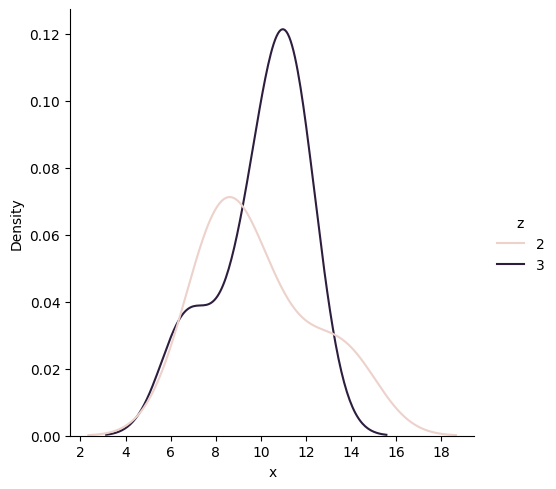

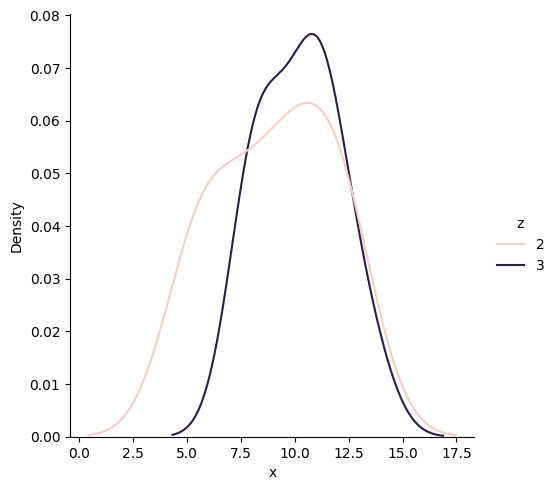

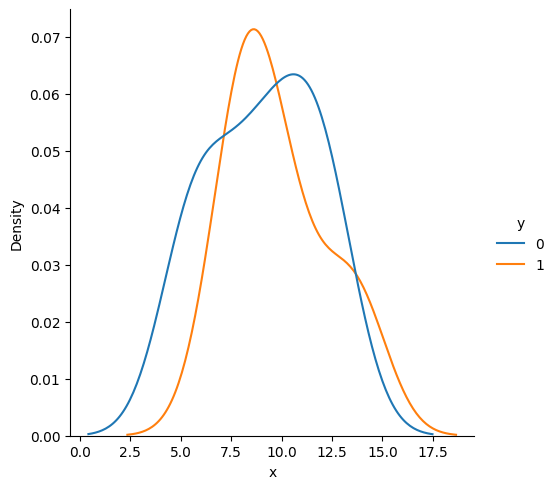

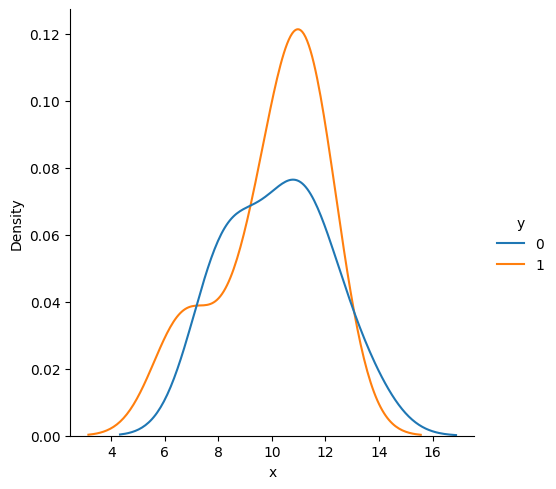

In [6]:
from scipy.stats import shapiro
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")


y0z2=[] # 1 группа:  y=0, z=2
y0z3=[] # 2 группа:  y=0, z=3
y1z2=[] # 3 группа:  y=1, z=2
y1z3=[] # 4 группа:  y=1, z=3
for i in range(0, len(df.x)):
    if df.y[i]==1 and df.z[i]==2:
        y1z2.append(df.x[i])
    elif df.y[i]==0 and df.z[i]==2:
        y0z2.append(df.x[i])
    elif df.y[i]==1 and df.z[i]==3:
        y1z3.append(df.x[i])
    else: y0z3.append(df.x[i])

# делаем тест Shapiro для каждой группы 1-4
shap3=shapiro(y1z2)
shap1=shapiro(y0z2)
shap4=shapiro(y1z3)
shap2=shapiro(y0z3)
print(shap1)
print(shap2)
print(shap3)
print(shap4)

sns.displot(x='x', data=df[df.y==1], hue="z", kind="kde")
plt.show()

sns.displot(x='x', data=df[df.y==0], hue="z", kind="kde")
plt.show()

sns.displot(x='x', data=df[df.z==2], hue="y", kind="kde")
plt.show()

sns.displot(x='x', data=df[df.z==3], hue="y", kind="kde")
plt.show()